In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [54]:
job_data = {
    'job_id' : [1, 2, 3, 4, 5],
    'job_title' : ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name' : ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location' : ['Gurugram', 'Bengaluru', 'Pune', 'Noida', 'Hyderabad']
}

company_data = {
    'company_name' : ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry' : ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverages'],
    'company_size' : ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_company = pd.DataFrame(company_data)

In [55]:
df_jobs.merge(df_company, on='company_name')
df_jobs.set_index('job_id', inplace=True)
df_jobs


,job_title,company_name,job_location
job_id,,,
1,Data Scientist,Google,Gurugram
2,Software Engineer,Microsoft,Bengaluru
3,Product Manager,Apple,Pune
4,Marketing Director,Nike,Noida
5,HR Manager,Starbucks,Hyderabad


In [56]:
df_usa_software_pivot = pd.read_csv("software_jobs.csv", index_col='job_posted_month')
df_usa_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,11741,9208,6561,4523
February,13828,8804,6835,4476
March,12363,8500,6769,4319
April,12130,9712,5786,4437
May,11524,9206,5196,4546
June,12591,9371,7236,4768
July,11803,9615,7340,4753
August,11523,9320,6009,4361
September,11910,8598,6003,4131


In [60]:
#code from previous file
df_usa = df[df['job_country'] == 'United States'].copy()
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month
df_usa_pivot = df_usa_pivot.sort_values('month_no')
df_usa_pivot = df_usa_pivot.set_index('job_posted_month')

#dropping month_no column because we do not need it anymore. We just needed it to sort the months
df_usa_pivot = df_usa_pivot.drop(columns='month_no')

df_usa_pivot




job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [63]:
df_usa_merged = df_usa_pivot.merge(df_usa_software_pivot, on='job_posted_month')
df_usa_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,11741,9208,6561,4523
February,447,24,6124,3060,4956,56,1258,878,1127,90,13828,8804,6835,4476
March,438,19,6218,3183,4779,59,1114,829,1150,115,12363,8500,6769,4319
April,565,40,6049,2801,4867,51,1025,781,991,112,12130,9712,5786,4437
May,279,20,4993,2976,4377,49,839,746,914,90,11524,9206,5196,4546
June,446,32,5683,2893,4645,48,1009,812,1033,93,12591,9371,7236,4768
July,581,39,5201,2570,4876,65,883,747,1095,153,11803,9615,7340,4753
August,903,39,6634,3269,6318,68,1186,903,1515,194,11523,9320,6009,4361
September,897,50,4639,3224,4568,113,805,775,1014,228,11910,8598,6003,4131


In [ ]:
top_5 = (df_usa_merged
         .sum()
         .sort_values(ascending=False)
         .head(5)
         .index       #this is helping to extract the name of values associated.
         .to_list()
        )
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

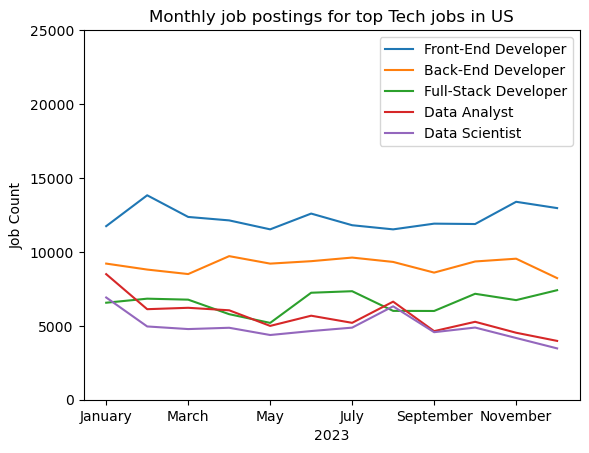

In [76]:
df_usa_merged[top_5].plot(kind='line')
plt.title('Monthly job postings for top Tech jobs in US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.ylim(0, 25000)     #it will increase the y-axis limit and hence the legend will also go to the top and will not overlap the graph
plt.show()